In [80]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [81]:
multi_root = 'results/multi/'

sinkhorn = 'accelerated'
flows = f'flows/{sinkhorn}_'
corrs = f'corr_matrix/{sinkhorn}_'
times = f'times/{sinkhorn}_'
subgs = f'subg/{sinkhorn}_'
inverses = f'inverse_func/{sinkhorn}_'
corr_matrix = f'inverse_func/{sinkhorn}_'

In [82]:
corr_matrix = f'inverse_func/{sinkhorn}_'

In [83]:
n = 20
mu = 0.25

f, c, t = [], [], []
f_n_k, c_n_k, t_n_k = [], [], []
inv, sbg = [], []

flow_n = np.loadtxt(multi_root + flows + str(n-1) + '_flows.txt', delimiter = ' ')
time_n = np.loadtxt(multi_root + times + str(n-1) + '_time.txt', delimiter = ' ')
c_n = np.loadtxt(multi_root + corrs + str(n-1) + '_corr_matrix.txt', delimiter = ' ')
subg_n = np.loadtxt(multi_root + subgs + str(n-1) + '_nabla_func.txt', delimiter = ' ')
inverse_n = np.loadtxt(multi_root + inverses + str(n-1) + '_inverse_func.txt', delimiter = ' ')

In [84]:
for ms_i in range(n):
    if ms_i == 0:
        flow_0 = np.loadtxt(multi_root + flows + str(ms_i) + '_flows.txt', delimiter = ' ')
        time_0 = np.loadtxt(multi_root + times + str(ms_i) + '_time.txt', delimiter = ' ')
        corr_0 = np.loadtxt(multi_root + corrs + str(ms_i) + '_corr_matrix.txt', delimiter = ' ')
        subg_0 = np.loadtxt(multi_root + subgs + str(ms_i) + '_nabla_func.txt', delimiter = ' ')
        inverse_0 = np.loadtxt(multi_root + inverses + str(ms_i) + '_inverse_func.txt',  delimiter = ' ')
        
        f_n_k.append(np.linalg.norm(flow_n - flow_0))
        t_n_k.append(np.linalg.norm(time_n - time_0))
        c_n_k.append(np.linalg.norm(c_n - corr_0))
    else:
        flow = np.loadtxt(multi_root + flows + str(ms_i) + '_flows.txt',  delimiter = ' ')
        time = np.loadtxt(multi_root + times + str(ms_i) + '_time.txt',  delimiter = ' ')
        corr = np.loadtxt(multi_root + corrs + str(ms_i) + '_corr_matrix.txt', delimiter = ' ')
        subg = np.loadtxt(multi_root + subgs + str(ms_i) + '_nabla_func.txt',  delimiter = ' ')
        inverse = np.loadtxt(multi_root + inverses + str(ms_i) + '_inverse_func.txt', delimiter = ' ')
        
        inv.append(inverse)
        sbg.append(subg)
        t.append(time)
        
        f.append(np.linalg.norm(flow - flow_0))
#         t.append(np.linalg.norm(time - time_0))
        c.append(np.linalg.norm(corr - corr_0))
        
        flow_0 = flow
        time_0 = time
        corr_0 = corr
        
        f_n_k.append(np.linalg.norm(flow_n - flow_0))
        t_n_k.append(np.linalg.norm(time_n - time_0))
        c_n_k.append(np.linalg.norm(c_n - corr_0))

In [85]:
np.shape(t[0])

(2198,)

##### Критерий

1) $\| \nabla f(t^k) \|_2 * 2\|t^0 - t^k\|_2 $

2) $2\|t^0 - t^k\|_2$

можно брать $5\|t^0\|_2$ вместо выражения 2)

In [86]:
t_0 = np.loadtxt(multi_root + times + '0_time.txt',  delimiter = ' ')
def criteria(inv, sbg, t, t_0):
    f = sbg + inv
#     print(t, t_0)
    return np.linalg.norm(f)*np.linalg.norm(2*t_0)

In [87]:
crit = []
for i in range(len(inv)):
    crit.append(criteria(inv[i], sbg[i], t[i], t_0))

In [88]:
crit[0]

3925.4419084872934

In [89]:
n

20

In [90]:
flow_n
flow_n_orig = np.loadtxt('results/multi/' + flows + str(n-1) + '_flows.txt', 
                          delimiter = ' ')

In [91]:
flow_n_orig - flow_n

array([0., 0., 0., ..., 0., 0., 0.])

In [92]:
flow_n

array([1047.0569726 , 1047.0569726 ,   -0.        , ..., 1427.63778886,
        400.13511279,  400.13511279])

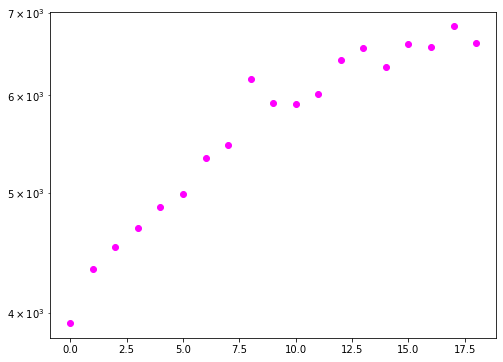

In [93]:
w = 8
h = 6
plt.figure(figsize=(w, h))
plt.plot(crit, 'o', color='magenta')
plt.yscale('log')

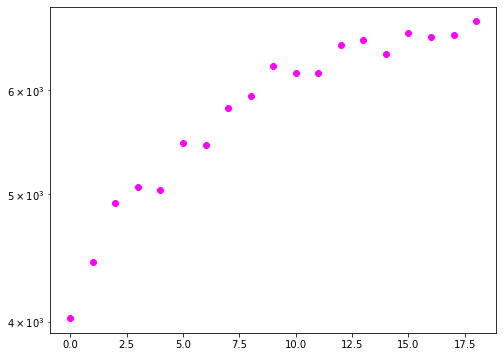

In [79]:
w = 8
h = 6
plt.figure(figsize=(w, h))
plt.plot(crit, 'o', color='magenta')
plt.yscale('log')

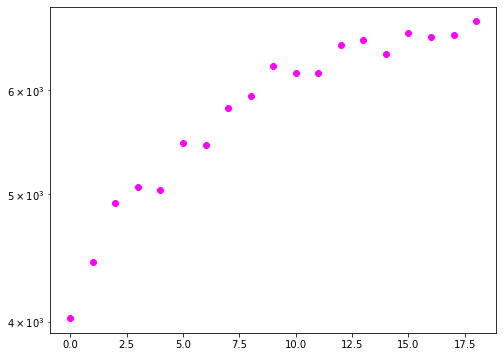

In [35]:
w = 8
h = 6
plt.figure(figsize=(w, h))
plt.plot(crit, 'o', color='magenta')
plt.yscale('log')

In [36]:
len(crit), len(crit[5:])

(19, 14)

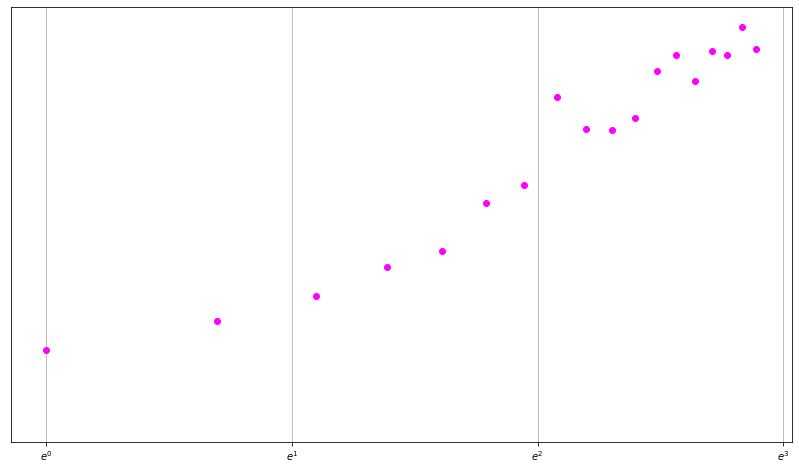

<Figure size 432x288 with 0 Axes>

In [94]:
w = 14
h = 8
# # plt.figure(figsize=(w, h))
# # plt.loglog(crit, 'o', color='magenta')
import matplotlib.ticker as mtick

fig, ax = plt.subplots(figsize=(w, h))

ax.loglog(crit, 'o', color='magenta', basex=np.e, basey=np.e)

def ticks(y, pos):
    return r'$e^{:.0f}$'.format(np.log(y))

ax.xaxis.set_major_formatter(mtick.FuncFormatter(ticks))
ax.yaxis.set_major_formatter(mtick.FuncFormatter(ticks))

# plt.yticks(np.arange(1, 2*10**10, step=0.1*np.e**10))

# plt.ylim(np.e*10**6.7, np.e*10**7.01)
plt.grid()
plt.show()
plt.savefig(multi_root + 'crit_log_log.png')
np.savetxt(multi_root + 'crit.txt', crit, delimiter=' ')

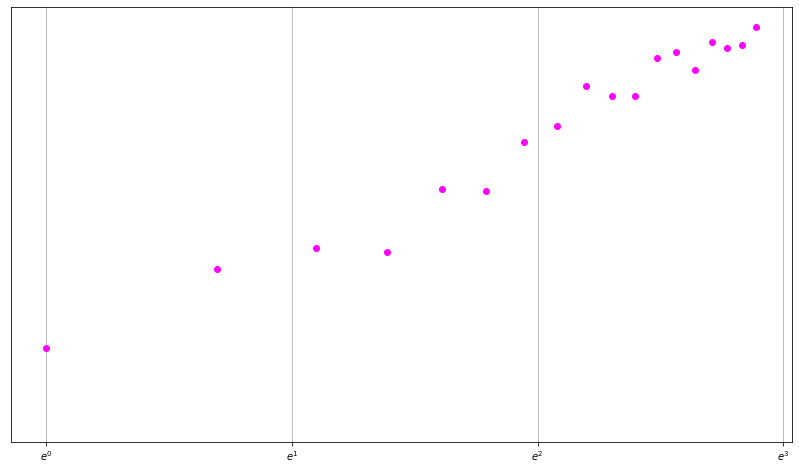

<Figure size 432x288 with 0 Axes>

In [37]:
w = 14
h = 8
# # plt.figure(figsize=(w, h))
# # plt.loglog(crit, 'o', color='magenta')
import matplotlib.ticker as mtick

fig, ax = plt.subplots(figsize=(w, h))

ax.loglog(crit, 'o', color='magenta', basex=np.e, basey=np.e)

def ticks(y, pos):
    return r'$e^{:.0f}$'.format(np.log(y))

ax.xaxis.set_major_formatter(mtick.FuncFormatter(ticks))
ax.yaxis.set_major_formatter(mtick.FuncFormatter(ticks))

# plt.yticks(np.arange(1, 2*10**10, step=0.1*np.e**10))

# plt.ylim(np.e*10**6.7, np.e*10**7.01)
plt.grid()
plt.show()
plt.savefig(multi_root + 'crit_log_log.png')
np.savetxt(multi_root + 'crit.txt', crit, delimiter=' ')

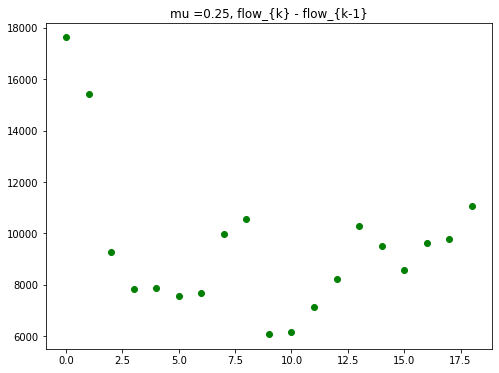

In [95]:
w = 8
h = 6
plt.figure(figsize=(w, h))
# plt.ylim(0, 50)
# plt.xlim(0, 250)
plt.plot(f, 'o', color='green')
plt.title('mu =' + str(mu) + ', ' + 'flow_{k} - flow_{k-1}')
plt.savefig(multi_root + 'flow_{k} - flow_{k-1}.png')

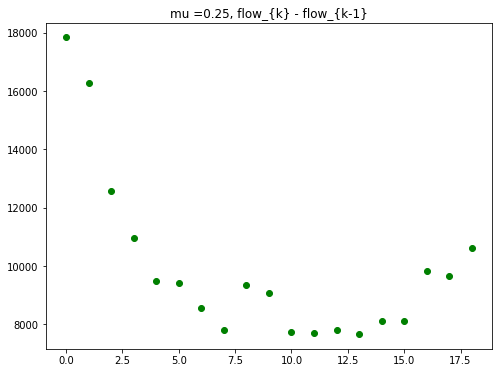

In [58]:
w = 8
h = 6
plt.figure(figsize=(w, h))
# plt.ylim(0, 50)
# plt.xlim(0, 250)
plt.plot(f, 'o', color='green')
plt.title('mu =' + str(mu) + ', ' + 'flow_{k} - flow_{k-1}')
plt.savefig(multi_root + 'flow_{k} - flow_{k-1}.png')

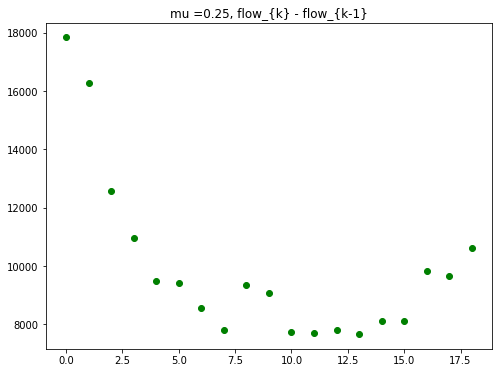

In [39]:
w = 8
h = 6
plt.figure(figsize=(w, h))
# plt.ylim(0, 50)
# plt.xlim(0, 250)
plt.plot(f, 'o', color='green')
plt.title('mu =' + str(mu) + ', ' + 'flow_{k} - flow_{k-1}')
plt.savefig(multi_root + 'flow_{k} - flow_{k-1}.png')

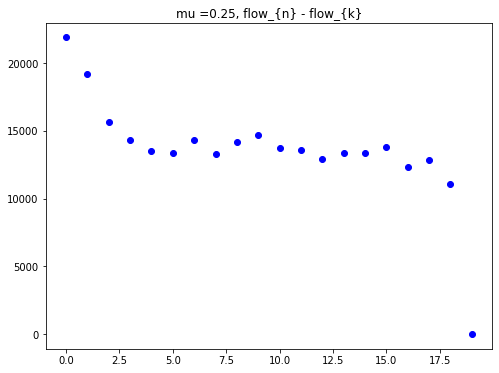

In [96]:
w = 8
h = 6
plt.figure(figsize=(w, h))
# plt.xlim(0, 2050)
plt.plot(f_n_k, 'o', color='blue')
plt.title('mu =' + str(mu) + ', ' + 'flow_{n} - flow_{k}')
plt.savefig(multi_root + 'flow_{n} - flow_{k}.png')

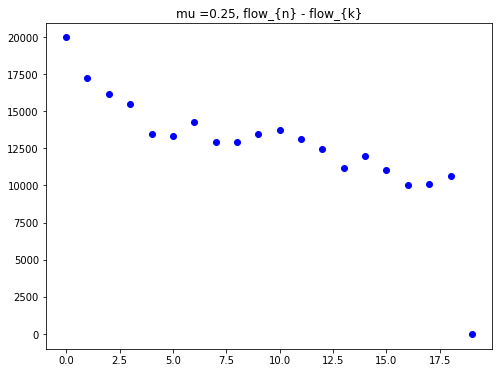

In [59]:
w = 8
h = 6
plt.figure(figsize=(w, h))
# plt.xlim(0, 2050)
plt.plot(f_n_k, 'o', color='blue')
plt.title('mu =' + str(mu) + ', ' + 'flow_{n} - flow_{k}')
plt.savefig(multi_root + 'flow_{n} - flow_{k}.png')

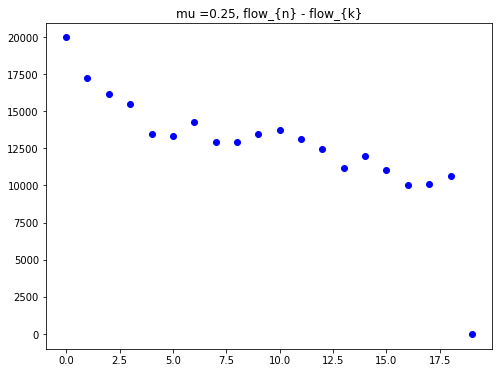

In [40]:
w = 8
h = 6
plt.figure(figsize=(w, h))
# plt.xlim(0, 2050)
plt.plot(f_n_k, 'o', color='blue')
plt.title('mu =' + str(mu) + ', ' + 'flow_{n} - flow_{k}')
plt.savefig(multi_root + 'flow_{n} - flow_{k}.png')

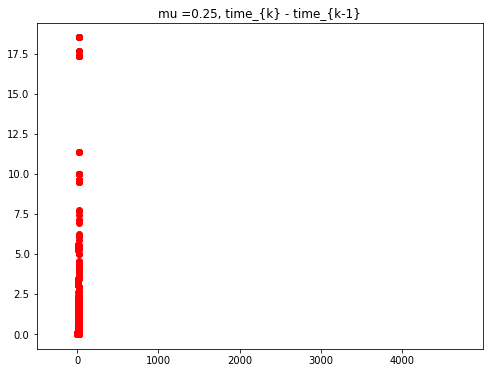

In [60]:
w = 8
h = 6
plt.figure(figsize=(w, h))
plt.xlim(-500, 4999)
# plt.ylim(0.01, 0.05)
plt.plot(t, 'o', color='red')
plt.title('mu =' + str(mu) + ', ' + 'time_{k} - time_{k-1}')
plt.savefig(multi_root + 'time_{k} - time_{k-1}.png')

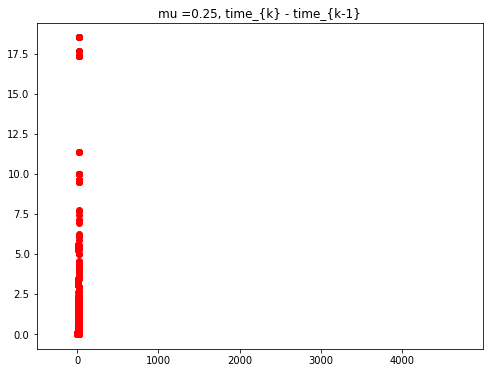

In [41]:
w = 8
h = 6
plt.figure(figsize=(w, h))
plt.xlim(-500, 4999)
# plt.ylim(0.01, 0.05)
plt.plot(t, 'o', color='red')
plt.title('mu =' + str(mu) + ', ' + 'time_{k} - time_{k-1}')
plt.savefig(multi_root + 'time_{k} - time_{k-1}.png')

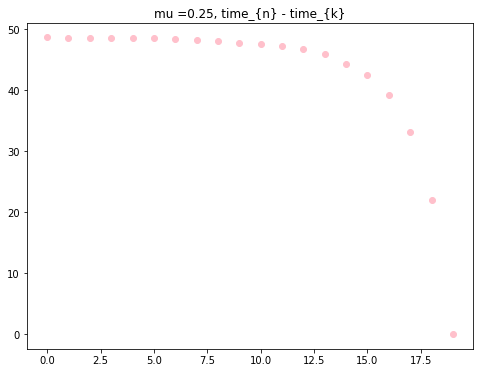

In [97]:
w = 8
h = 6
plt.figure(figsize=(w, h))
# plt.ylim(117937, 117923)
# plt.ylim(0, 1)
plt.plot(t_n_k, 'o', color='pink')
plt.title('mu =' + str(mu) + ', ' + 'time_{n} - time_{k}')
plt.savefig(multi_root + 'time_{n} - time_{k}.png')

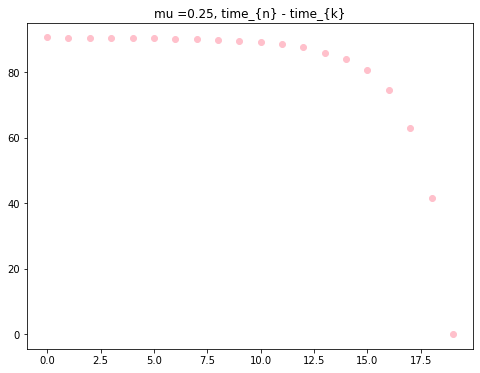

In [61]:
w = 8
h = 6
plt.figure(figsize=(w, h))
# plt.ylim(117937, 117923)
# plt.ylim(0, 1)
plt.plot(t_n_k, 'o', color='pink')
plt.title('mu =' + str(mu) + ', ' + 'time_{n} - time_{k}')
plt.savefig(multi_root + 'time_{n} - time_{k}.png')

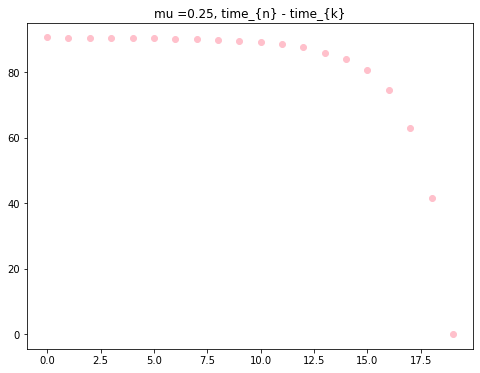

In [42]:
w = 8
h = 6
plt.figure(figsize=(w, h))
# plt.ylim(117937, 117923)
# plt.ylim(0, 1)
plt.plot(t_n_k, 'o', color='pink')
plt.title('mu =' + str(mu) + ', ' + 'time_{n} - time_{k}')
plt.savefig(multi_root + 'time_{n} - time_{k}.png')

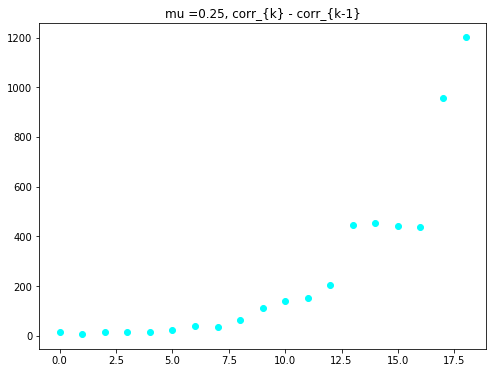

In [62]:
w = 8
h = 6
plt.figure(figsize=(w, h))
# plt.ylim(0, 2)
# plt.ylim(67000, 62500)
plt.plot(c, 'o', color='cyan')
plt.title('mu =' + str(mu) + ', ' + 'corr_{k} - corr_{k-1}')
plt.savefig(multi_root + 'corr_{k} - corr_{k-1}.png')

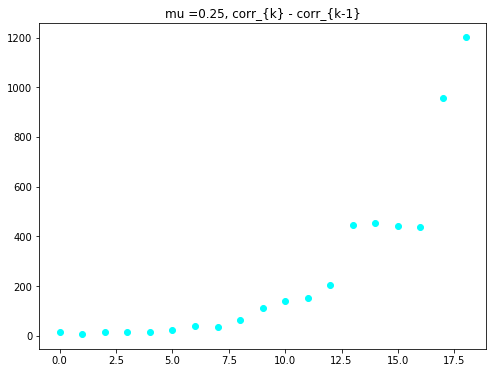

In [43]:
w = 8
h = 6
plt.figure(figsize=(w, h))
# plt.ylim(0, 2)
# plt.ylim(67000, 62500)
plt.plot(c, 'o', color='cyan')
plt.title('mu =' + str(mu) + ', ' + 'corr_{k} - corr_{k-1}')
plt.savefig(multi_root + 'corr_{k} - corr_{k-1}.png')

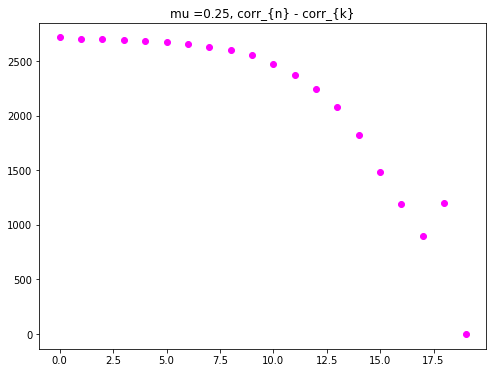

In [63]:
w = 8
h = 6
plt.figure(figsize=(w, h))
# plt.ylim(117937, 117923)
# plt.ylim(0, 200)
plt.plot(c_n_k, 'o', color='magenta')
plt.title('mu =' + str(mu) + ', ' + 'corr_{n} - corr_{k}')
plt.savefig(multi_root + 'corr_{n} - corr_{k}.png')

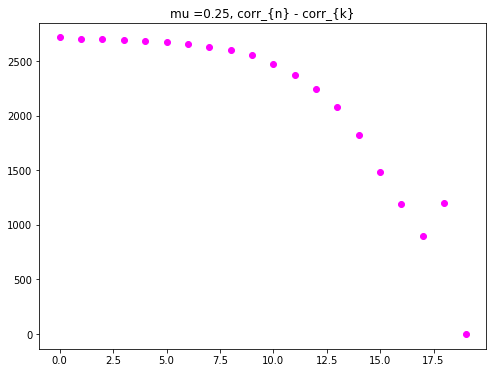

In [44]:
w = 8
h = 6
plt.figure(figsize=(w, h))
# plt.ylim(117937, 117923)
# plt.ylim(0, 200)
plt.plot(c_n_k, 'o', color='magenta')
plt.title('mu =' + str(mu) + ', ' + 'corr_{n} - corr_{k}')
plt.savefig(multi_root + 'corr_{n} - corr_{k}.png')